In [1]:
# -*- coding: utf-8 -*-
"""
Spyderエディタ

これは一時的なスクリプトファイルです
"""

import pandas as pd
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, PandasTools, Descriptors
from rdkit.Chem.Draw import IPythonConsole
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns',250)
print('rdkit version: ',rdBase.rdkitVersion)

rdkit version:  2019.03.4


In [2]:
""" readme bbbp 血液脳関門透過性（透過性）のバイナリラベル """ 
bbbp = pd.read_csv('./BBBP.csv',index_col=0)

# smilesからmoleオブジェクトを作成し、DataFrameに格納
PandasTools.AddMoleculeColumnToFrame(bbbp,'smiles')

#　欠損値確認
bbbp.isnull().sum()

RDKit ERROR: [16:13:09] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit WARNING: [16:13:09] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [16:13:09] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit WARNING: [16:13:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:10] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [16:13:10] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit WARNING: [16:13:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:

name       0
p_np       0
smiles     0
ROMol     11
dtype: int64

In [3]:
# ROMolが作成されなかったsmilesを抽出
bbbp[bbbp.ROMol.isnull()]

,name,p_np,smiles,ROMol
num,,,,
60,15,1,O=N([O-])C1=C(CN=C1NCCSCc2ncccc2)Cc3ccccc3,None
62,22767,1,c1(nc(NC(N)=[NH2])sc1)CSCCNC(=[NH]C#N)NC,None
393,ICI17148,1,Cc1nc(sc1)\[NH]=C(\N)N,None
616,5-6,1,s1cc(CSCCN\C(NC)=[NH]\C#N)nc1\[NH]=C(\N)N,None
644,12,0,c1c(c(ncc1)CSCCN\C(=[NH]\C#N)NCC)Br,None
647,16,1,n1c(csc1\[NH]=C(\N)N)c1ccccc1,None
648,17,0,n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N,None
649,18,0,n1c(csc1\[NH]=C(\N)N)c1cccc(c1)NC(C)=O,None
650,19,0,n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N\C(NC)=[NH]\C#N,None


In [4]:
#　molを作れなかった行の削除
bbbp = bbbp.dropna() 
bbbp.isnull().sum()

name      0
p_np      0
smiles    0
ROMol     0
dtype: int64

In [5]:
bbbp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 1 to 2053
Data columns (total 4 columns):
name      2039 non-null object
p_np      2039 non-null int64
smiles    2039 non-null object
ROMol     2039 non-null object
dtypes: int64(1), object(3)
memory usage: 79.6+ KB


In [6]:
# ターゲットp-npの分布を確認
bbbp.p_np.value_counts()

1    1560
0     479
Name: p_np, dtype: int64

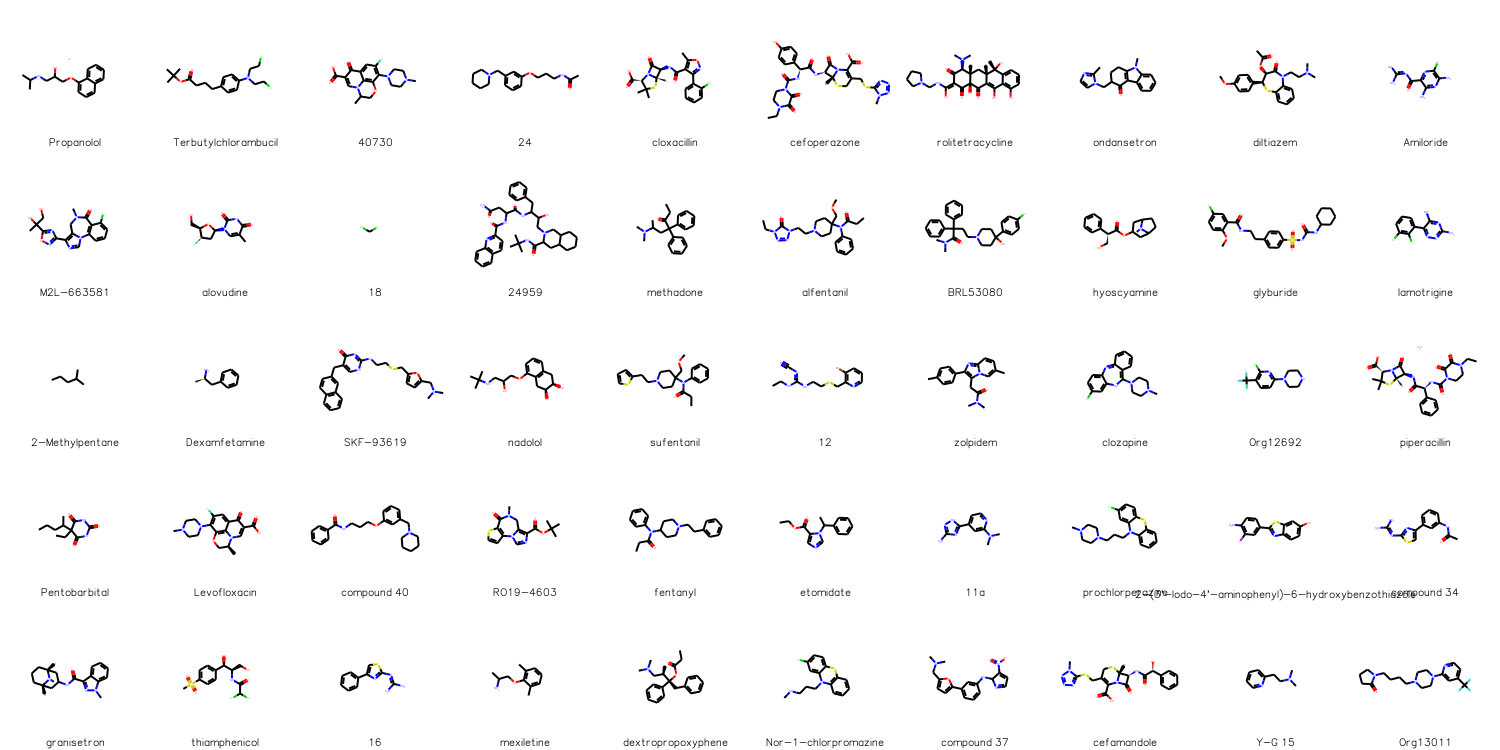

In [7]:
#　化学構造を一覧で表示
PandasTools.FrameToGridImage(bbbp[:70], column='ROMol', legendsCol='name', molsPerRow=10, subImgSize=(150,150))

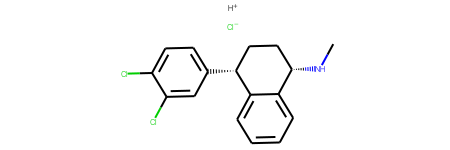

In [8]:
bbbp.ROMol[61]

In [9]:
# dataframe中のmolオブジェクトに対して一括で記述子を生成する
for i,j in Descriptors.descList:
    bbbp[i] = bbbp.ROMol.map(j)
bbbp.describe()

RDKit WARNING: [16:13:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:19] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:13:20] WARNING: not r

,p_np,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2.039000e+03,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2.039000e+03,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.0,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.0,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.00000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.00000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,20

データセットの俯瞰

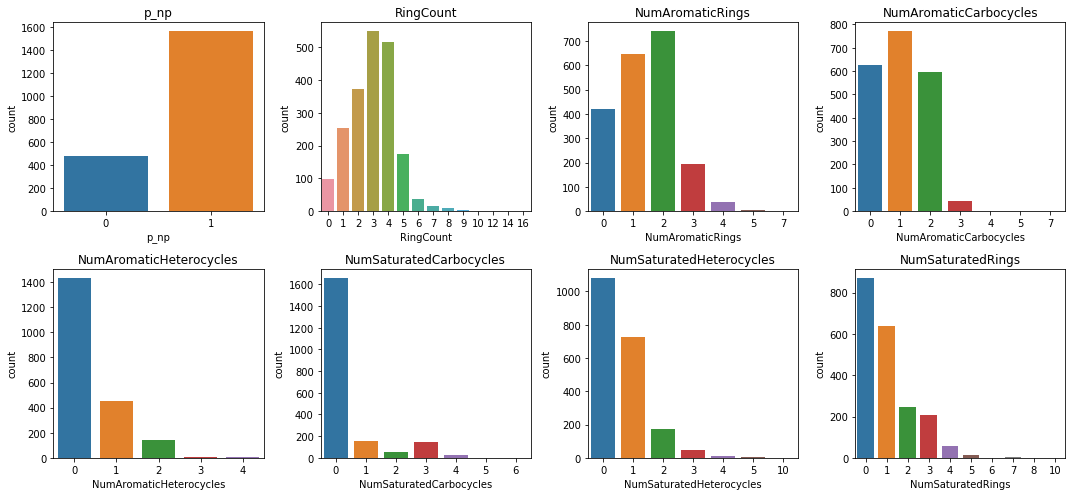

In [10]:
import matplotlib.pyplot as plt
import math

list = ["p_np", "RingCount", "NumAromaticRings", "NumAromaticCarbocycles", "NumAromaticHeterocycles", "NumSaturatedCarbocycles", "NumSaturatedHeterocycles", "NumSaturatedRings"]

fig = plt.figure(figsize=(15,7))
for i, c in enumerate(list):
   ax = fig.add_subplot(
       math.ceil(len(list) / 4), 4, i + 1)
   # plot the continent on these axes
   sns.countplot(x=c, data=bbbp,  ax=ax)
   ax.set_title(c)
fig.tight_layout()
plt.show()

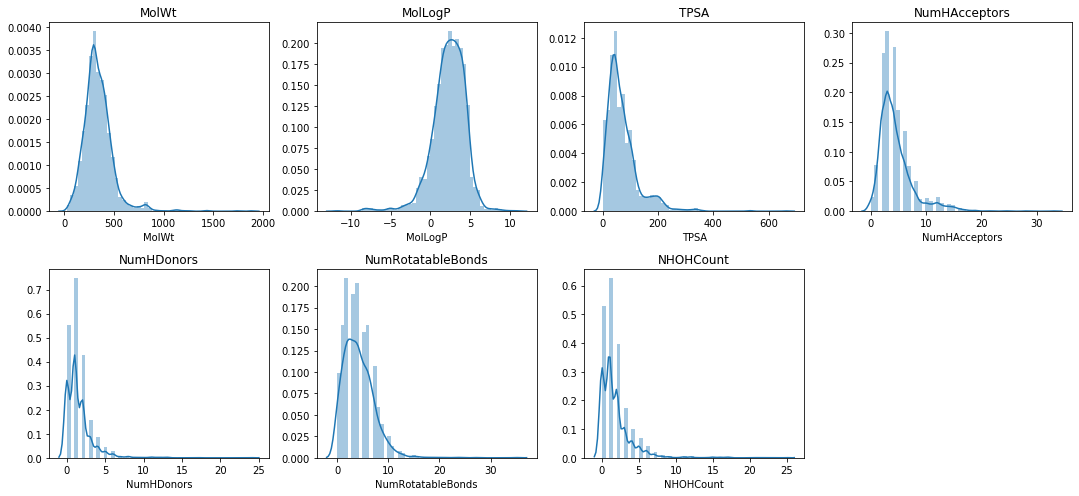

In [11]:
list = ["MolWt","MolLogP", "TPSA","NumHAcceptors", "NumHDonors", "NumRotatableBonds", "NHOHCount"]

fig = plt.figure(figsize=(15,7))
for i, c in enumerate(list):
   ax = fig.add_subplot(
       math.ceil(len(list) / 4), 4, i + 1)
   # plot the continent on these axes
   sns.distplot(bbbp[c],  ax=ax)
   ax.set_title(c)
fig.tight_layout()
plt.show()

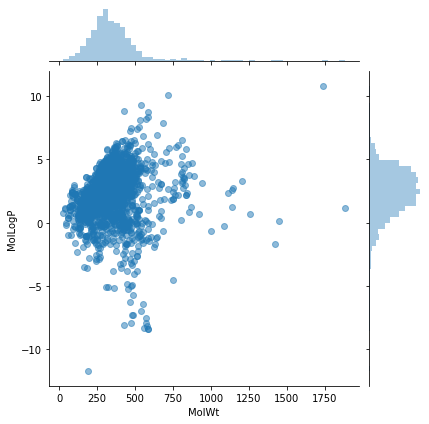

In [12]:
sns.jointplot(x="MolWt", y="MolLogP", data=bbbp,
              alpha=0.5,)

In [13]:
# targetに対する可視化

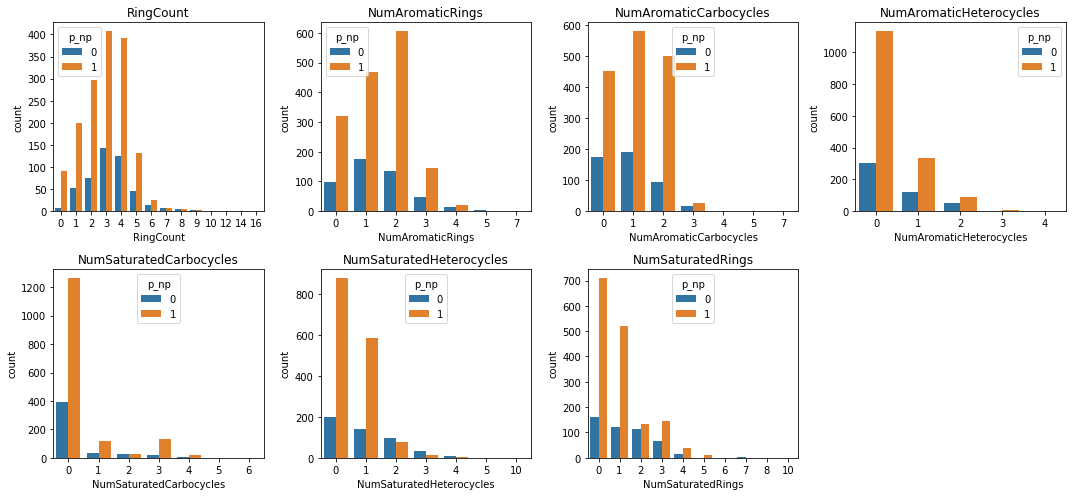

In [14]:
list = ["RingCount", "NumAromaticRings", "NumAromaticCarbocycles", "NumAromaticHeterocycles", "NumSaturatedCarbocycles", "NumSaturatedHeterocycles", "NumSaturatedRings"]


fig = plt.figure(figsize=(15,7))
for i, c in enumerate(list):
   ax = fig.add_subplot(
       math.ceil(len(list) / 4), 4, i + 1)
   # plot the continent on these axes
   sns.countplot(x=c, data=bbbp, ax=ax, hue="p_np")
   ax.set_title(c)
fig.tight_layout()
plt.show()

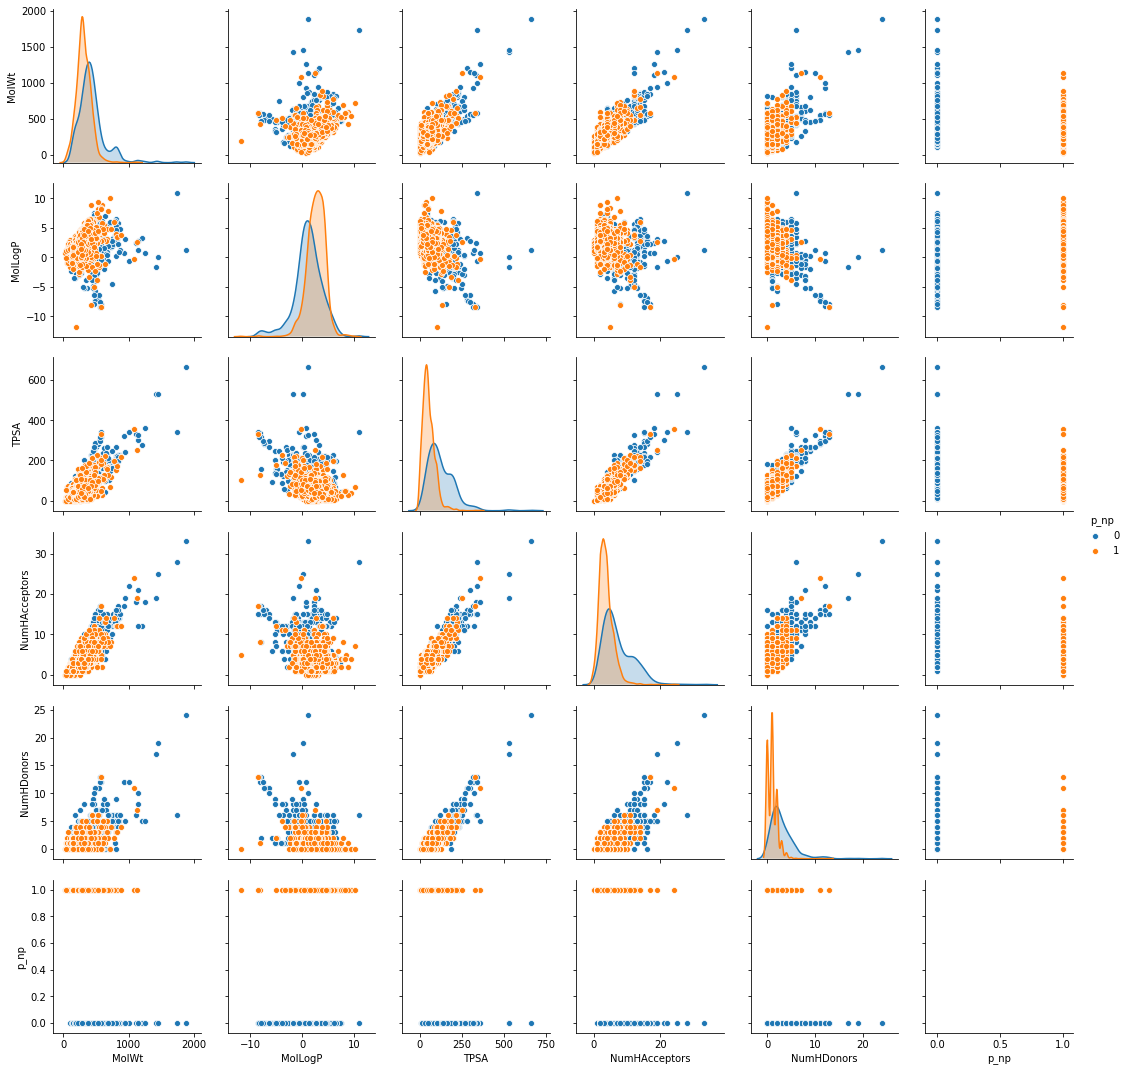

In [15]:
list = ["MolWt","MolLogP", "TPSA", "NumHAcceptors", "NumHDonors", "p_np"]
df = bbbp[list]
sns.pairplot(df, hue="p_np")

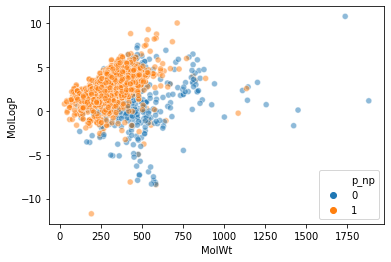

In [16]:
sns.scatterplot(x="MolWt", y="MolLogP", data=bbbp,
                hue="p_np",
                alpha=0.5)